# 《数据采集与清洗》
## 第一次作业内容： 网页抓取
### 具体目标：
+ 用``urllib.requests``库发起一次``get``请求，输出``response``文本信息；
+ 用``Requests``库伪装成火狐浏览器发起一次``post``请求，输出``response``文本信息；
+ 用``Requests``库中的``session``对象发出``get``请求，设置``cookies``并获取，输出获取的``cookies``内容；
+ 实现抓取网页的不去重深度遍历算法，自选合适的种子网站和相关参数，输出结果；
+ 编写抓取网页的广度遍历算法（含去重和不去重），自选合适的种子网站和相关参数，输出结果；
+ (选)将抓取网页的去重深度遍历算法封装成对象（类），并测试。

### 注：
+ 代码要有注释，结果要有分析；
+ 本次作业提交截至时间：2020年3月10日(星期二)；
+ 文件命名规则: 班级号+学号+姓名+作业序号，示例：``1_20188989899_张三_1``；
+ 提交方式：1班发送至邮箱：632994085@qq.com；2班发送至邮箱：786888939@qq.com.

### 问题1：用``urllib.requests``库发起一次``get``请求，输出``response``文本信息。

In [1]:
import requests  # 导出requests
r = requests.get("https://www.baidu.com") # 用get方法访问百度
print(r.status_code)  # 查看网页状态码，如果是200则继续
r.encoding = r.apparent_encoding  # 修改响应内容编码方式
print(r.encoding)
print(r.text)  # 打印response文本信息

200
utf-8
<!DOCTYPE html>
<!--STATUS OK--><html> <head><meta http-equiv=content-type content=text/html;charset=utf-8><meta http-equiv=X-UA-Compatible content=IE=Edge><meta content=always name=referrer><link rel=stylesheet type=text/css href=https://ss1.bdstatic.com/5eN1bjq8AAUYm2zgoY3K/r/www/cache/bdorz/baidu.min.css><title>百度一下，你就知道</title></head> <body link=#0000cc> <div id=wrapper> <div id=head> <div class=head_wrapper> <div class=s_form> <div class=s_form_wrapper> <div id=lg> <img hidefocus=true src=//www.baidu.com/img/bd_logo1.png width=270 height=129> </div> <form id=form name=f action=//www.baidu.com/s class=fm> <input type=hidden name=bdorz_come value=1> <input type=hidden name=ie value=utf-8> <input type=hidden name=f value=8> <input type=hidden name=rsv_bp value=1> <input type=hidden name=rsv_idx value=1> <input type=hidden name=tn value=baidu><span class="bg s_ipt_wr"><input id=kw name=wd class=s_ipt value maxlength=255 autocomplete=off autofocus=autofocus></span><span class

分析：
+ 由打印出来的html内容可以看到有`head`部分和`body`部分
+ 其中`head`部分可以看到很多基本的参数
+ `body`部分有很多的网页超链接

### 用``Requests``库伪装成火狐浏览器发起一次``post``请求，输出``response``文本信息。

200


















































    


 
 














    














 
 


    

















    <!doctype html><html class="a-no-js" data-19ax5a9jf="dingo">
    <head>
<script type="text/javascript">var ue_t0=ue_t0||+new Date();</script>
<script type="text/javascript">
window.ue_ihb = (window.ue_ihb || window.ueinit || 0) + 1;
if (window.ue_ihb === 1) {
var ue_hob=+new Date();
var ue_id='V7QANNZT92N2C9RA7Q00',
ue_csm = window,
ue_err_chan = 'jserr-rw',
ue = {};
(function(d){var e=d.ue=d.ue||{},f=Date.now||function(){return+new Date};e.d=function(b){return f()-(b?0:d.ue_t0)};e.stub=function(b,a){if(!b[a]){var c=[];b[a]=function(){c.push([c.slice.call(arguments),e.d(),d.ue_id])};b[a].replay=function(b){for(var a;a=c.shift();)b(a[0],a[1],a[2])};b[a].isStub=1}};e.exec=function(b,a){return function(){try{return b.apply(this,arguments)}catch(c){ueLogError(c,{attribution:a||"undefined",logLevel:"WARN"})}}}})(ue_csm);

ue.stub(ue,"log");ue.stub(ue,"onunload");
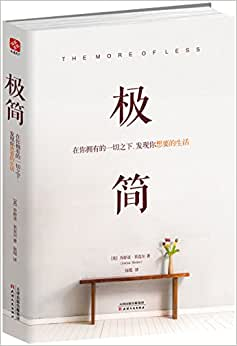

In [2]:
import requests  # 导出requests
kv = {'user-agent':'Mozilla/5.0'}  # 伪装成火狐浏览器为了访问亚马逊
r = requests.post("https://www.amazon.cn/gp/product/B01M8L5z3Y",headers = kv)  # 用post方法访问亚马逊
print(r.status_code)  # 查看网页状态码，如果是200则继续
r.encoding = r.apparent_encoding  # 修改响应内容编码方式
print(r.text)  # 打印response文本信息

由输出的信息可以看出亚马逊是一个大站，网站上面有很多的页面信息，非常的复杂，信息非常的丰富。

### 用``Requests``库中的``session``对象发出``get``请求，设置``cookies``并获取，输出获取的``cookies``内容。 

In [3]:
import requests  # 导入requests库
import json
s = requests.Session()
s.get('http://httpbin.org/cookies/set/Yang/12345678')# 用session对象发出另外一个get请求，获取cookies 
r = s.get("http://httpbin.org/cookies") # 显示设置之后的结果 
print(json.loads(r.text))

{'cookies': {'Yang': '12345678'}}


以字典形式返回了设置的cookies内容

### 实现抓取网页的不去重深度遍历算法，自选合适的种子网站和相关参数，输出结果。


In [4]:
import requests, re
count = 10
r = re.compile(r'href=[\'"]?(http[^\'" >]+)')
seed = 'https://www.hao123.com/' # 这是一个神奇的网站，专门为爬虫练习而生
queue = [seed]
storage = {}
while len(queue) > 0 and count > 0:
    try:
        url = queue.pop(-1)
        html = requests.get(url,timeout=5).text
        new_urls = r.findall(html)
        queue.extend(new_urls)
        storage[url] = len(new_urls)
        for new_url in new_urls:
            print(new_url)
        count -= 1
    except Exception as e:
        print(url)
        print(e)

https://dgss0.bdstatic.com
https://dgss1.bdstatic.com
https://dgss2.bdstatic.com
https://dgss3.bdstatic.com
https://s.click.taobao.com/LkFcknv
https://pan.baidu.com/
http://app.hao123.com/app
http://dl.hao123.com/waphao123/n_apk/hao1231019956s.apk
https://ccc-x.jd.com/dsp/cl?posid=1999&amp;v=707&amp;union_id=1000023384&amp;pid=2147&amp;tagid=125063&amp;didmd5=__IMEI__&amp;idfamd5=__IDFA__&amp;did=__IMEIIMEI__&amp;idfa=__IDFAIDFA__&amp;to=https://miaosha.jd.com/
https://voice.baidu.com/act/newpneumonia/newpneumonia/?from=osari_pc_4
https://voice.baidu.com/act/newpneumonia/newpneumonia/?from=osari_pc_4
http://www.hao123.com/redian/sheshouyef.htm
http://www.hao123.com/redian/sheshouyef.htm
http://www.baidu.com/s?word=%E6%B9%96%E5%8D%97%E9%95%BF%E6%B2%99%E4%B8%80%E5%91%A8%E5%A4%A9%E6%B0%94%E9%A2%84%E6%8A%A5&tn=50000167_hao_pg&ie=utf-8
http://www.baidu.com/s?word=%E6%B9%96%E5%8D%97%E9%95%BF%E6%B2%99%E5%A4%A9%E6%B0%94&amp;tn=50000167_hao_pg&amp;ie=utf-8
http://www.baidu.com/s?word=%E6%B9%96%

https://vv.bdstatic.com/static/videoui/img/favicon-4_f4b9465.ico
https://sv.bdstatic.com/static/haokan-pc/style/0.346d4d.css
https://sv.bdstatic.com/static/haokan-pc/style/1.ddbde4.css
https://sv.bdstatic.com/static/haokan-pc/style/videoland.02cae0.css
https://baijiahao.baidu.com/builder/app/choosetype?src_from=haokanPC
https://baijiahao.baidu.com/builder/app/choosetype?src_from=haokanPC
https://vv.bdstatic.com/static/videoui/img/favicon-4_f4b9465.ico
https://sv.bdstatic.com/static/haokan-pc/style/0.346d4d.css
https://sv.bdstatic.com/static/haokan-pc/style/1.ddbde4.css
https://sv.bdstatic.com/static/haokan-pc/style/videoland.02cae0.css
https://baijiahao.baidu.com/builder/app/choosetype?src_from=haokanPC
https://baijiahao.baidu.com/builder/app/choosetype?src_from=haokanPC


分析：从输出结果可以看出深度爬取出现了很多重复的URL

### 编写抓取网页的广度遍历算法（含去重和不去重），自选合适的种子网站和相关参数，输出结果。 

In [5]:
# 不去重
import requests, re
count = 10
r = re.compile(r'href=[\'"]?(http[^\'" >]+)')
seed = 'https://www.hao123.com/' # 这是一个神奇的网站，专门为爬虫练习而生
queue = [seed]
storage = {}
while len(queue) > 0 and count > 0:
    try:
        url = queue.pop(0)  # 广度遍历
        html = requests.get(url,timeout=5).text  #用get 方法发出请求
        new_urls = r.findall(html)
        queue.extend(new_urls)
        storage[url] = len(new_urls)
        for new_url in new_urls:
            print(new_url)
        count -= 1
    except Exception as e:
        print(url)
        print(e)

https://dgss0.bdstatic.com
https://dgss1.bdstatic.com
https://dgss2.bdstatic.com
https://dgss3.bdstatic.com
https://s.click.taobao.com/LkFcknv
https://pan.baidu.com/
http://app.hao123.com/app
http://dl.hao123.com/waphao123/n_apk/hao1231019956s.apk
https://ccc-x.jd.com/dsp/cl?posid=1999&amp;v=707&amp;union_id=1000023384&amp;pid=2147&amp;tagid=125063&amp;didmd5=__IMEI__&amp;idfamd5=__IDFA__&amp;did=__IMEIIMEI__&amp;idfa=__IDFAIDFA__&amp;to=https://miaosha.jd.com/
https://voice.baidu.com/act/newpneumonia/newpneumonia/?from=osari_pc_4
https://voice.baidu.com/act/newpneumonia/newpneumonia/?from=osari_pc_4
http://www.hao123.com/redian/sheshouyef.htm
http://www.hao123.com/redian/sheshouyef.htm
http://www.baidu.com/s?word=%E6%B9%96%E5%8D%97%E9%95%BF%E6%B2%99%E4%B8%80%E5%91%A8%E5%A4%A9%E6%B0%94%E9%A2%84%E6%8A%A5&tn=50000167_hao_pg&ie=utf-8
http://www.baidu.com/s?word=%E6%B9%96%E5%8D%97%E9%95%BF%E6%B2%99%E5%A4%A9%E6%B0%94&amp;tn=50000167_hao_pg&amp;ie=utf-8
http://www.baidu.com/s?word=%E6%B9%96%

http://www.baidu.com
http://weibo.com/p/1006062952668222
http://help.baidu.com/add?prod_id=29&amp;ptype=48#3
https://pan.baidu.com/union/printing?from=login
https://pan.baidu.com/mall/home?from=login
https://pan.baidu.com/union?from=panlogin
https://pan.baidu.com/buy/center?tag=8&amp;from=loginpage
https://pan.baidu.com/mall/home?from=panhome
https://pan.baidu.com/union?from=web
http://yun.baidu.com/disk/privacy
http://yun.baidu.com/disk/version
http://yun.baidu.com/disk/help
http://copyright.baidu.com/index.php/index/complaint
http://e.baidu.com?refer=1008
http://s0.m.hao123img.com
http://s1.m.hao123img.com
http://1.hao123.com
http://fex.bdstatic.com
http://suez.baidu.com
https://gss0.bdstatic.com/5eR1cXSg2QdV5wybn9fN2DJv/assets/wise-activ/css/app/pc_68f0ecb.css
https://gss0.bdstatic.com/5eR1cXSg2QdV5wybn9fN2DJv/assets/wise-activ/css/base/idangerous.swiper2.7.6_7335de0.css
https://miaosha.jd.com/
https://a.jd.com/
https://plus.jd.com/index?flow_system=appicon&flow_entrance=appicon11&f

In [6]:
# 去重
import requests, re
count = 3
r = re.compile(r'href=[\'"]?(http[^\'" >]+)')
seed = 'https://www.hao123.com/' # 爬取hao123网站信息
queue = [seed]
used = set() # 设置一个集合，保存已经抓取过的 URL
storage = {}
while len(queue) > 0 and count > 0: 
    try:
        url = queue.pop(0)   # 广度遍历
        html = requests.get(url).text
        storage[url] = html
        used.add(url)
        new_urls = r.findall(html)
        for new_url in new_urls:     # for遍历爬取到的所有URL
            if new_url not in used and new_url not in queue:
                queue.append(new_url)   # 将没有遍历过的URL添加到集合中
        count -= 1
    except Exception as e:
        print(url)
        print(e)
from collections import Counter  
url_count = Counter(queue)
for url,count in url_count.most_common(10):
    print(url,count)  #打印去重后的信息

https://dgss2.bdstatic.com 1
https://dgss3.bdstatic.com 1
https://s.click.taobao.com/LkFcknv 1
https://pan.baidu.com/ 1
http://app.hao123.com/app 1
http://dl.hao123.com/waphao123/n_apk/hao1231019956s.apk 1
https://ccc-x.jd.com/dsp/cl?posid=1999&amp;v=707&amp;union_id=1000023384&amp;pid=2147&amp;tagid=125063&amp;didmd5=__IMEI__&amp;idfamd5=__IDFA__&amp;did=__IMEIIMEI__&amp;idfa=__IDFAIDFA__&amp;to=https://miaosha.jd.com/ 1
https://voice.baidu.com/act/newpneumonia/newpneumonia/?from=osari_pc_4 1
http://www.hao123.com/redian/sheshouyef.htm 1
http://www.baidu.com/s?word=%E6%B9%96%E5%8D%97%E9%95%BF%E6%B2%99%E4%B8%80%E5%91%A8%E5%A4%A9%E6%B0%94%E9%A2%84%E6%8A%A5&tn=50000167_hao_pg&ie=utf-8 1


### (选)将抓取网页的去重深度遍历算法封装成对象（类），并测试。 

In [7]:
# 这里编写代码

In [8]:
# 测试

这里对结果进行分析。